# Accuracy Comparison

In [101]:
# Standard packages
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections  as mc
import statistics

# Local packages
from simulate import *

In [ ]:
# Load data. Less than 2 MiB.
# Data aggregated over 5 runs, up to 100ms of simulation
with open('polybench-medium-multifidelity.pkl', 'rb') as file:
    mf = pickle.load(file)
with open('polybench-medium-normal.pkl', 'rb') as file:
    norm = pickle.load(file)

In [4]:
nomf = ['atax', 'bicg', 'ftdt-2d', 'lu']

In [104]:
names = list(mf.st.keys())
y_norm_mean = [norm.st[n].IPC.mean for n in names]
y_norm_sem  = [norm.st[n].IPC.sem  for n in names]
y_mf_mean   = [mf.st[n].IPC.mean   for n in names]
y_mf_sem    = [mf.st[n].IPC.sem    for n in names]

def calc_mean(xs):
    xs = (sorted(xs))[1:-1]
    return np.mean(xs)

def calc_sd(xs):
    xs = (sorted(xs))[1:-1]
    return statistics.stdev(xs)

# WARNING - CHANGING SEM TO SD
y_norm_mean = [calc_mean(norm.st[n].ipc) for n in names]
y_norm_sem   = [calc_sd(norm.st[n].ipc) for n in names]
y_mf_mean   = [calc_mean(mf.st[n].ipc) for n in names]
y_mf_sem     = [calc_sd(mf.st[n].ipc) for n in names]

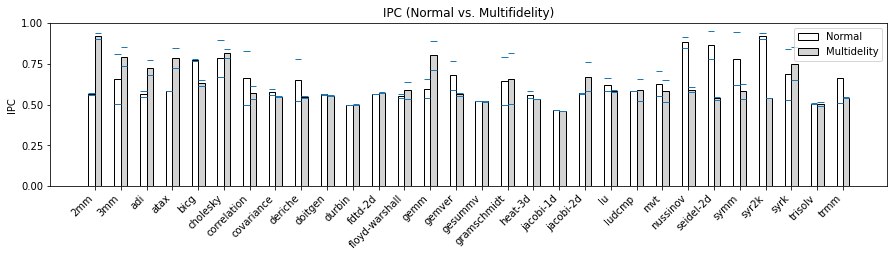

In [105]:
x = np.arange(len(names))
width = 0.25
fig, ax = plt.subplots()
ax.bar(x-(width/2), y_norm_mean, width, color='white', label='Normal', edgecolor='black')
ax.bar(x+(width/2), y_mf_mean, width, color='lightgrey', label='Multidelity', edgecolor='black')

lines = []
for i in range(len(names)):
    #lines.append([(i-(width/2),y_norm_mean[i]-y_norm_sem[i]), (i-(width/2),y_norm_mean[i]+y_norm_sem[i])])
    lines.append([(i-width,y_norm_mean[i]-y_norm_sem[i]), (i,y_norm_mean[i]-y_norm_sem[i])])
    lines.append([(i-width,y_norm_mean[i]+y_norm_sem[i]), (i,y_norm_mean[i]+y_norm_sem[i])])
    lines.append([(i,y_mf_mean[i]-y_mf_sem[i]), (i+width,y_mf_mean[i]-y_mf_sem[i])])
    lines.append([(i,y_mf_mean[i]+y_mf_sem[i]), (i+width,y_mf_mean[i]+y_mf_sem[i])])


#c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, linewidths=1)
ax.add_collection(lc)

ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45, ha='right')
ax.set_ylim((0,1))
ax.set_ylabel('IPC', rotation=90)
ax.set_title('IPC (Normal vs. Multifidelity)')
ax.autoscale()
plt.legend()

#ax.yaxis.set_label_coords(-.07, 0.96)
nyticks = 5
ax.set_yticks([(1/(nyticks-1))*x for x in np.arange(nyticks)])
fig.set_size_inches((15,3))
#plt.tight_layout()

In [170]:
pct_err = []

def p_err(approx, exact):
    return (approx-exact)/exact * 100
def mape(arr):
    return np.mean(np.absolute(arr))

print('Percent error\n')
name_len = max([len(name) for name in names])
for (i, name) in enumerate(names):
    pe = p_err(y_mf_mean[i], y_norm_mean[i])
    pct_err.append(pe)
    print(f'{i}'.ljust(2), f'{name}'.ljust(name_len), f'{pe: 06.2f}%')
    
print(f'\nMAPE: {mape(pct_err):.2f}%')

Percent error

0  2mm             62.88%
1  3mm             20.75%
2  adi             28.18%
3  atax            35.14%
4  bicg           -18.07%
5  cholesky        03.74%
6  correlation    -13.43%
7  covariance     -05.00%
8  deriche        -15.94%
9  doitgen        -01.44%
10 durbin          00.89%
11 fdtd-2d         01.11%
12 floyd-warshall  06.18%
13 gemm            34.33%
14 gemver         -17.15%
15 gesummv        -00.38%
16 gramschmidt     02.29%
17 heat-3d        -04.85%
18 jacobi-1d      -00.85%
19 jacobi-2d       18.00%
20 lu             -06.32%
21 ludcmp          01.17%
22 mvt            -07.43%
23 nussinov       -32.98%
24 seidel-2d      -37.77%
25 symm           -25.58%
26 syr2k          -41.34%
27 syrk            09.24%
28 trisolv        -00.03%
29 trmm           -17.80%

MAPE: 15.67%


In [169]:
# Speed up calculations
mf_times_seconds = []
norm_times_seconds = []
for name in names:
    mf_times_seconds.append(mf.st[name].times.real.mean/nu.s)
    norm_times_seconds.append(norm.st[name].times.real.mean/nu.s)

speedup_pct = [((mf_times_seconds[i] / norm_times_seconds[i])-1)*100 for i in range(len(names))]

print('Percent speedup\n')
for i in range(len(names)):
    print(f'{i}'.ljust(2), f'{names[i]}'.ljust(name_len), f'{speedup_pct[i]: 7.2f}%')

print(f'\nAverage percent speedup: {np.mean(speedup_pct):.2f}%')

Percent speedup

0  2mm              74.38%
1  3mm              47.11%
2  adi              85.76%
3  atax            139.73%
4  bicg            145.56%
5  cholesky         51.34%
6  correlation       8.06%
7  covariance       12.93%
8  deriche          34.66%
9  doitgen          38.03%
10 durbin           41.11%
11 fdtd-2d         157.63%
12 floyd-warshall   46.58%
13 gemm             83.09%
14 gemver          112.48%
15 gesummv          79.50%
16 gramschmidt      26.05%
17 heat-3d          57.74%
18 jacobi-1d        54.24%
19 jacobi-2d        61.77%
20 lu              144.99%
21 ludcmp           45.69%
22 mvt              70.33%
23 nussinov         -5.82%
24 seidel-2d         7.70%
25 symm              6.84%
26 syr2k           -14.64%
27 syrk             47.73%
28 trisolv          86.48%
29 trmm              6.20%

Average percent speedup: 58.44%


0.23067817930949291